# Introduction
State notebook purpose here

# Set environment
Import libraries and write settings here.

In [71]:
# data handling
import pandas as pd

# visualization
import missingno as msno
import folium
from folium.plugins import FastMarkerCluster
import seaborn as sns
import matplotlib.pyplot as plt

## Import data

In [90]:
listings = pd.read_csv('listings.csv')
listings_details = pd.read_csv('listings_detailed.csv')

We can see that 'neihbourhood_group' is useless in the dataset, as it only contians NaN values, so we will drop this column.


Some missing values are also found in the columns concerning reviews, specifically in 'last_review' and 'reviews_per_month'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5289 entries, 0 to 5288
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5289 non-null   int64  
 1   name                            5289 non-null   object 
 2   host_id                         5289 non-null   int64  
 3   host_name                       5289 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   5289 non-null   object 
 6   latitude                        5289 non-null   float64
 7   longitude                       5289 non-null   float64
 8   room_type                       5289 non-null   object 
 9   price                           5289 non-null   int64  
 10  minimum_nights                  5289 non-null   int64  
 11  number_of_reviews               5289 non-null   int64  
 12  last_review                     42

<AxesSubplot:>

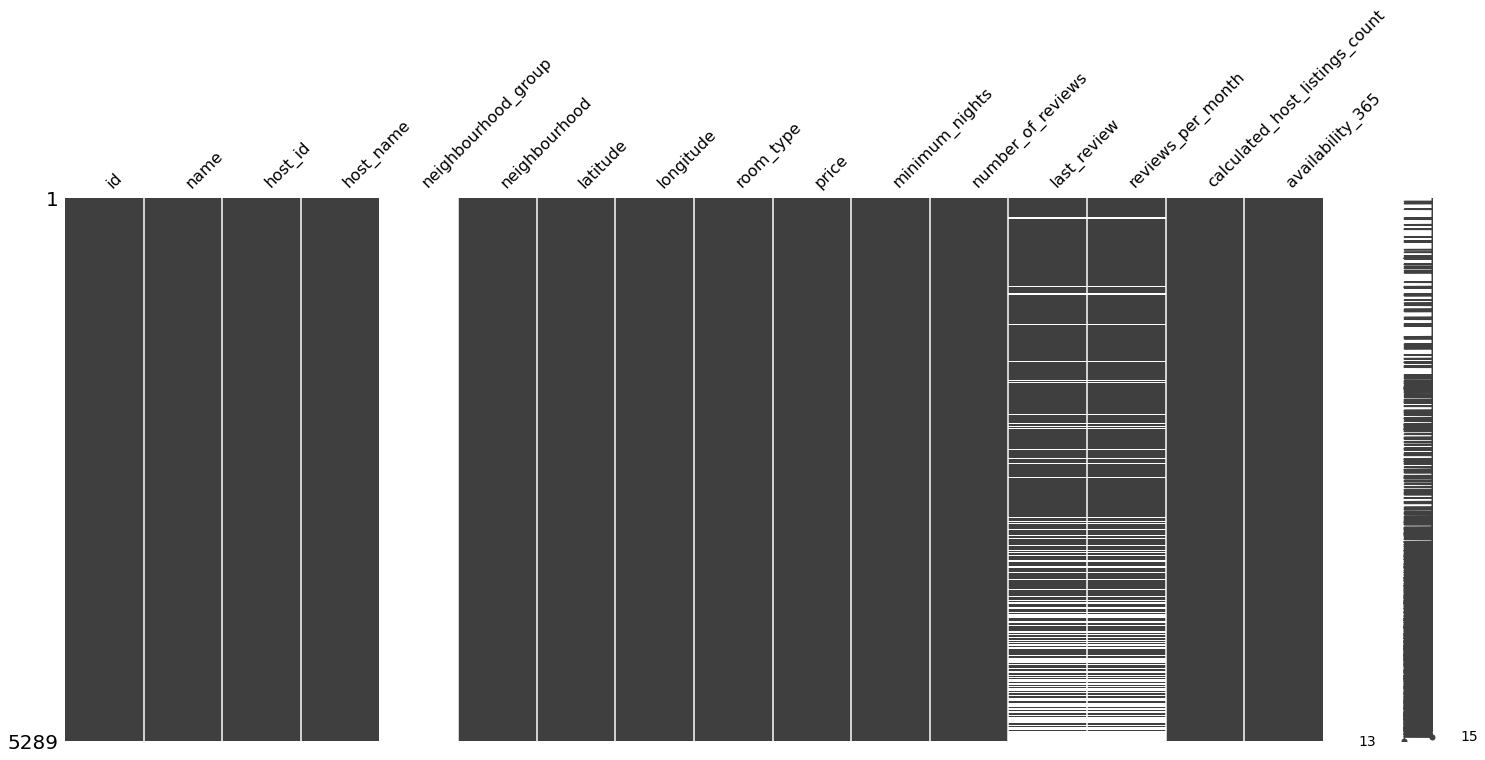

In [14]:
listings.info()
msno.matrix(listings)

In the extended dataset for listings we found 3 columns with only NaN values: 'neighbourhood_group_cleansed', 'bathrooms' and 'calendar_updated'. Another column with mostly NaN values is 'host_neighbourhood'.

We will drop these columns and keep only columns of interest for the current analysis.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5289 entries, 0 to 5288
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5289 non-null   int64  
 1   listing_url                                   5289 non-null   object 
 2   scrape_id                                     5289 non-null   int64  
 3   last_scraped                                  5289 non-null   object 
 4   name                                          5289 non-null   object 
 5   description                                   5285 non-null   object 
 6   neighborhood_overview                         2941 non-null   object 
 7   picture_url                                   5289 non-null   object 
 8   host_id                                       5289 non-null   int64  
 9   host_url                                      5289 non-null   o

<AxesSubplot:>

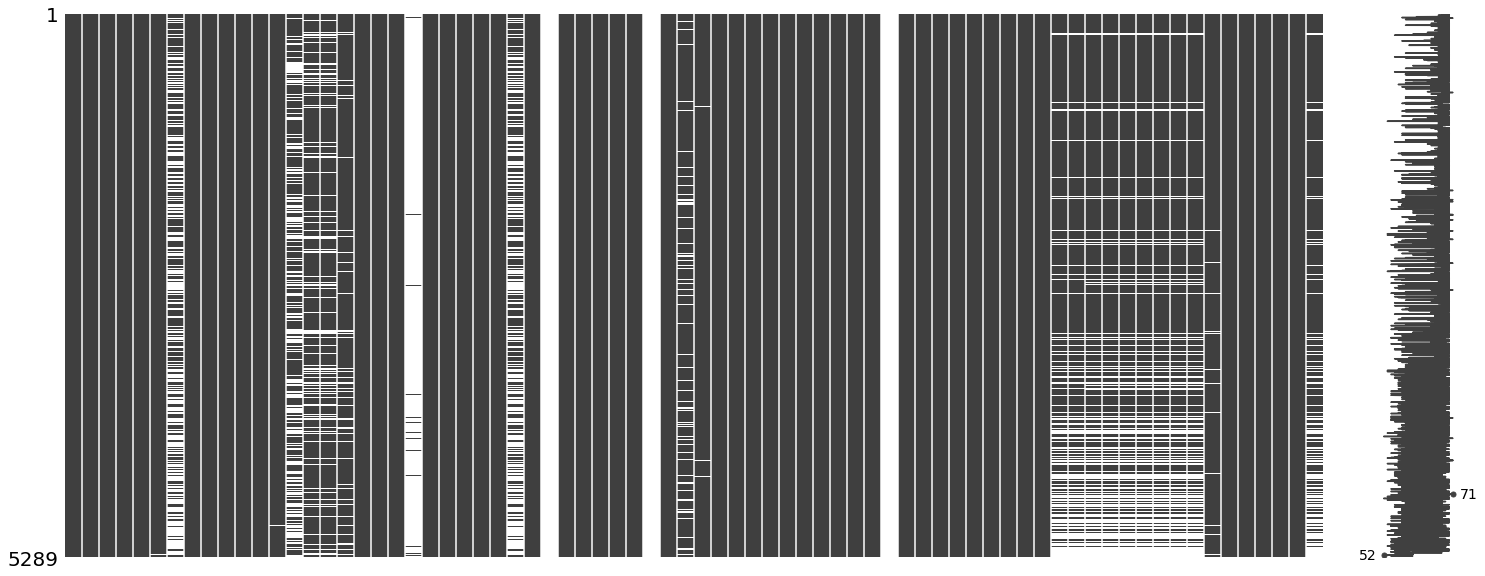

In [15]:
listings_details.info()
msno.matrix(listing_details)

# EDA

Let's print the head of 'listings' to see what king of information each column is offering us.

In [27]:
display(listings.head())

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,96033,"* Cosy flat 200m from the beach, El Palo/Malaga *",510467,Rafael & Adriana,NaN,Este,36.72031,-4.35627,Entire home/apt,23,5,89,2020-10-02,1.04,1,228
1,155696,"Wonderful sunny apartment, 2fl, very central",697056,Zeta,NaN,Centro,36.72723,-4.40720,Entire home/apt,180,3,18,2018-09-25,0.16,2,364
2,166473,Perfect Location In Malaga,793360,Fred,NaN,Este,36.71934,-4.35942,Private room,17,5,69,2020-10-15,0.62,3,365
3,212845,BEAUTIFUL DOUBLE ROOM IN MALAGA,617998,Valle,NaN,Este,36.72606,-4.36541,Shared room,39,2,36,2020-09-30,0.34,2,301
4,229511,MOUNTAIN VILLA WITH SEAVIEWS - PRIVATE POOL,1198693,Joaquin,NaN,Este,36.79087,-4.38198,Entire home/apt,190,5,3,2020-07-26,0.08,1,364


Is it possible that each Airbnb room/flat have a different 'id'? or maybe this would be addressed by 'host_id'? Let's explore this!

We can see that 'id' has the same length as the DataFrame. Therefore, 'Id' is giving us a different id for each Airbnb accomodation. On the other hand, Host id has a unique id for each host, so if a host has 3 accomodations offered in the platform, they will be registered under the same host id.

We can also see that the three hosts in the top 3 with the highest number of Airbnb accomodations have 218, 66 and 65 places offered respectively!

In [44]:
print('Id details: \n' + str(len(listings['id'].value_counts())))
print('\nHost id details: \n' + str(len(listings['host_id'].value_counts())))
print('\nHost with the highest number of Airbnb accomodations offered: \n\n' + str(listings['host_id'].value_counts().head(3)))

Id details: 
5289

Host id details: 
2327

Host with the highest number of Airbnb accomodations offered: 

80225433     218
5890675       66
115528688     65
Name: host_id, dtype: int64


## Map

First, let's create a map to visualize the number of hosts in the city of Málaga.

Let's extract the information of the location of each Airbnb host. In the listings DataFrame we have one column for the latitude and another for the longitude. We will zip both to use it in the interactive map.

We will locate the map in the following latitude and longitude, following data found in the web concerning the location of Málaga: (36.72016, -4.42034)

We can see in the map that most of the Airbnb hosts are located in the city of Malaga, while some place are found in the surrounding areas.

In [26]:
latitude = listings['latitude'].tolist()
longitude = listings['longitude'].tolist()
location_info = list(zip(latitude, longitude))

map_malaga = folium.Map(location=[36.72016, -4.42034],
                        zoom_start=12,
                        tiles='cartodbpositron')
FastMarkerCluster(location_info).add_to(map_malaga)
map_malaga

## Number of accomodations per neighbourhood

Let's explore then the number of accomodations offered by neighbourhood in Málaga.

We can see that Málaga Centro has the highest number of accomodations with 3591!, followed by Este with 578 and Carretera de Cádiz with 449.

,neighbourhood,id
0,Centro,3591
1,Este,578
2,Carretera de Cadiz,448
3,Cruz De Humilladero,229
4,Bailen-Miraflores,135
5,Churriana,104
6,Teatinos-Universidad,76
7,Ciudad Jardin,46
8,Palma-Palmilla,35
9,Puerto de la Torre,24


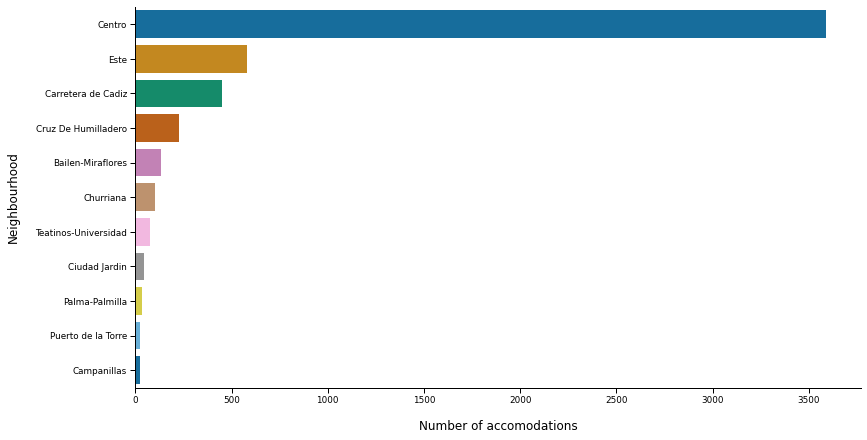

In [144]:
accomodations_per_neighbourhood = listings.groupby(['neighbourhood'])['id'].count().sort_values(ascending=False).reset_index()
display(accomodations_per_neighbourhood)

# plot
sns.set_context('paper')
ax, fig = plt.subplots(figsize=(13, 7))
sns.barplot(x='id', y='neighbourhood', data=accomodations_per_neighbourhood, orient='h', palette='colorblind')
plt.xlabel(xlabel='Number of accomodations', labelpad=15, fontsize=12)
plt.ylabel(ylabel='Neighbourhood', labelpad=15, fontsize=12)
sns.despine()

## Type of accomodation per neighbourhood

It will be quite interesting to know the type of accomodation that is offered in each neighbourhood, or if it is a tendency in some of them to offer certain type of rooms.

We could hypothesize that accomodations in Málaga Centro will be more 'private room' oriented, whereas in surrounding areas it could be possible to find more 'entire appartment' accomodations.

,neighbourhood,room_type,id
0,Centro,Entire home/apt,3122
1,Este,Entire home/apt,481
2,Centro,Private room,441
3,Carretera de Cadiz,Entire home/apt,327
4,Cruz De Humilladero,Entire home/apt,141
5,Carretera de Cadiz,Private room,121
6,Bailen-Miraflores,Entire home/apt,87
7,Cruz De Humilladero,Private room,87
8,Churriana,Entire home/apt,79
9,Este,Private room,78


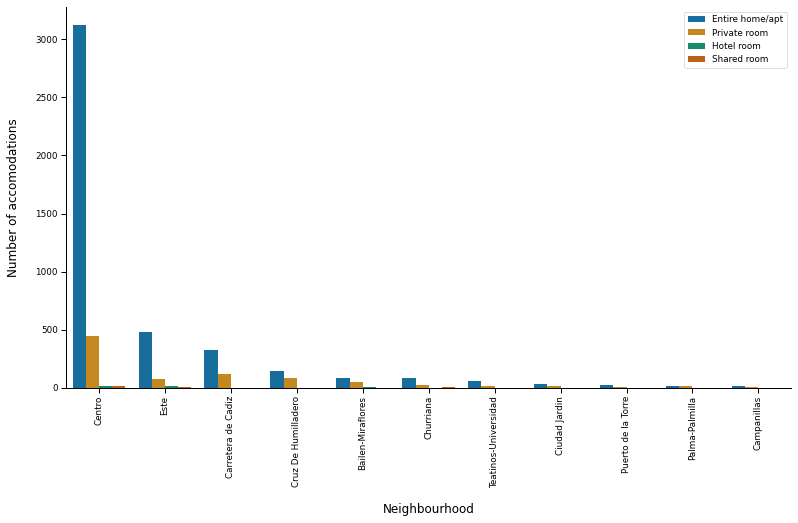

In [145]:
accomodations_per_neighbourhood_type = listings.groupby(['neighbourhood', 'room_type'])['id'].count().sort_values(ascending=False).reset_index()
display(accomodations_per_neighbourhood_type)

# plot
sns.set_context('paper')
ax, fig = plt.subplots(figsize=(13, 7))
sns.barplot(x='neighbourhood', y='id', data=accomodations_per_neighbourhood_type, hue='room_type', orient='v', palette='colorblind')
plt.xlabel(xlabel='Neighbourhood', labelpad=15, fontsize=12)
plt.ylabel(ylabel='Number of accomodations', labelpad=15, fontsize=12)
plt.legend(loc='upper right')
plt.xticks(rotation=90)
sns.despine()

## Price per neighbourhood and type of room

Now, let's see the the price per night in each neighbourhood and type of room. 

We have spotted some very extreme values in the sample, with entire apartments reaching 8000€, but even private rooms reaching more than that! Although this could be variabily in the sample, we will have to remove these outliers.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Este'),
  Text(1, 0, 'Centro'),
  Text(2, 0, 'Carretera de Cadiz'),
  Text(3, 0, 'Bailen-Miraflores'),
  Text(4, 0, 'Churriana'),
  Text(5, 0, 'Cruz De Humilladero'),
  Text(6, 0, 'Teatinos-Universidad'),
  Text(7, 0, 'Palma-Palmilla'),
  Text(8, 0, 'Puerto de la Torre'),
  Text(9, 0, 'Ciudad Jardin'),
  Text(10, 0, 'Campanillas')])

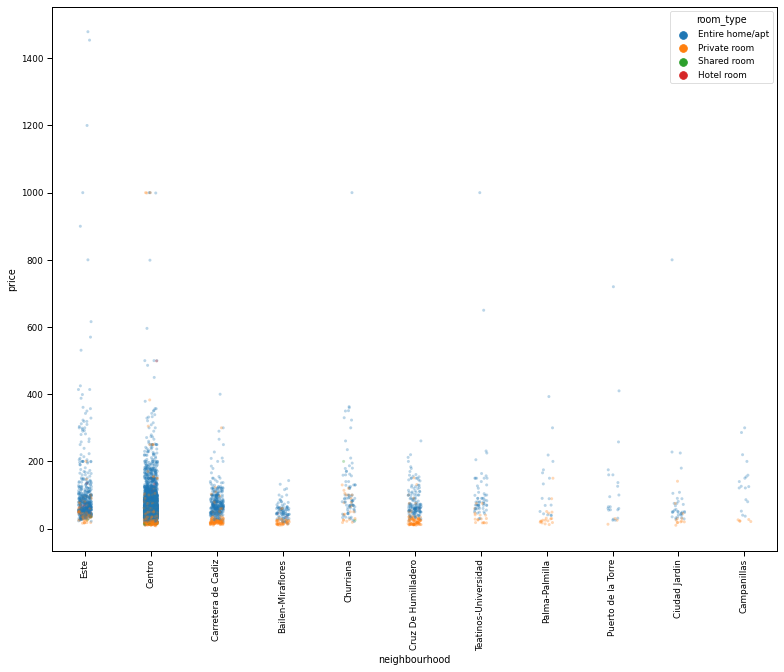

In [147]:
ax, fig = plt.subplots(figsize=(13, 10))
sns.stripplot(x='neighbourhood', y='price', data=listings, hue='room_type', size=3, alpha=.3)
plt.xticks(rotation=90)

In research, a common criteria is to remove those values that are 2 standard deviations above or below the mean, so we will see if it is neccesary to apply that criterion to our sample after exploring those rooms in more detail.

Okay, so it seems that Moriya is renting his/her 'Grandiose Glorious Villa with Heated Outdoor Pool', as he asks for a minimum 91 nights, we will drop this case. However, looking for additional information in Airbnb website, it seems that Unisierra apartments cost around 80-100€ per night, so we will keep their price in 80€ as it seems to be an error. We will also keep the price of Hotel Zenit Malaga in 90€.

In [113]:
display(listings[listings['price'] > 5000])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
104,1867072,DISFRUTA EL CENTRO HISTÓRICO (4),9598080,Unisierra,NaN,Centro,36.72001,-4.42234,Entire home/apt,8000,2,3,2018-07-22,0.05,4,244
106,1888913,DISFRUTA EL CENTRO HISTÓRICO (5),9598080,Unisierra,NaN,Centro,36.72043,-4.42191,Entire home/apt,8000,2,1,2017-12-06,0.03,4,244
313,5451045,DISFRUTA EL CENTRO HISTORICO (1),9598080,Unisierra,NaN,Centro,36.71824,-4.42134,Entire home/apt,8000,2,13,2018-10-14,0.19,4,244
934,15787767,MALAGA CENTER DE LUXE FLAT,88872403,Francisco,NaN,Centro,36.72908,-4.41146,Entire home/apt,8000,1,37,2019-08-18,0.77,3,167
3508,36242110,"Zenit Málaga, Doble",270940801,Hotel Zenit Malaga,NaN,Centro,36.73337,-4.41487,Private room,9026,1,0,NaN,NaN,6,365
3509,36242819,"Zenit Málaga, Doble Matrimonial",270940801,Hotel Zenit Malaga,NaN,Centro,36.73645,-4.41108,Private room,9026,1,0,NaN,NaN,6,365
3510,36242906,"Zenit Málaga, Doble con terraza",270940801,Hotel Zenit Malaga,NaN,Centro,36.73728,-4.41227,Private room,9026,1,0,NaN,NaN,6,365
4382,42591580,Grandiose Glorious Villa with Heated Outdoor Pool,2770598,Moriya,NaN,Carretera de Cadiz,36.71018,-4.43351,Entire home/apt,9000,91,0,NaN,NaN,2,365


In [128]:
# drop Moriya's accomodation
listings.drop(listings.loc[listings['id']==42591580].index, inplace=True)

# define conditions
condition_zenit = (listings['host_name'] == 'Hotel Zenit Malaga') & (listings['price'] > 5000)
condition_unisierra = (listings['host_name'] == 'Unisierra') & (listings['price'] > 5000)
condition_francisco = (listings['host_name'] == 'Francisco') & (listings['price'] > 5000)

# modify prices
listings.loc[condition_zenit, 'price'] = 80
listings.loc[condition_unisierra, 'price'] = 91
listings.loc[condition_francisco, 'price'] = 80

listings[listings['host_name'].str.contains('Unisierra|Zenit')]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
103,1836035,DISFRUTA EL CENTRO HISTÓRICO (3),9598080,Unisierra,NaN,Centro,36.71924,-4.42240,Entire home/apt,125,7,9,2017-12-17,0.11,4,67
104,1867072,DISFRUTA EL CENTRO HISTÓRICO (4),9598080,Unisierra,NaN,Centro,36.72001,-4.42234,Entire home/apt,91,2,3,2018-07-22,0.05,4,244
106,1888913,DISFRUTA EL CENTRO HISTÓRICO (5),9598080,Unisierra,NaN,Centro,36.72043,-4.42191,Entire home/apt,91,2,1,2017-12-06,0.03,4,244
313,5451045,DISFRUTA EL CENTRO HISTORICO (1),9598080,Unisierra,NaN,Centro,36.71824,-4.42134,Entire home/apt,91,2,13,2018-10-14,0.19,4,244
3508,36242110,"Zenit Málaga, Doble",270940801,Hotel Zenit Malaga,NaN,Centro,36.73337,-4.41487,Private room,80,1,0,NaN,NaN,6,365
3509,36242819,"Zenit Málaga, Doble Matrimonial",270940801,Hotel Zenit Malaga,NaN,Centro,36.73645,-4.41108,Private room,80,1,0,NaN,NaN,6,365
3510,36242906,"Zenit Málaga, Doble con terraza",270940801,Hotel Zenit Malaga,NaN,Centro,36.73728,-4.41227,Private room,80,1,0,NaN,NaN,6,365
4307,42087270,"Zenit Málaga, Doble con terraza",270940801,Hotel Zenit Malaga,NaN,Centro,36.73236,-4.41631,Private room,65,1,0,NaN,NaN,6,365
4308,42087332,"Zenit Málaga, Doble",270940801,Hotel Zenit Malaga,NaN,Centro,36.73228,-4.41624,Private room,45,1,0,NaN,NaN,6,365
4309,42087351,"Zenit Málaga, Doble Matrimonial",270940801,Hotel Zenit Malaga,NaN,Centro,36.73240,-4.41424,Private room,45,1,0,NaN,NaN,6,365


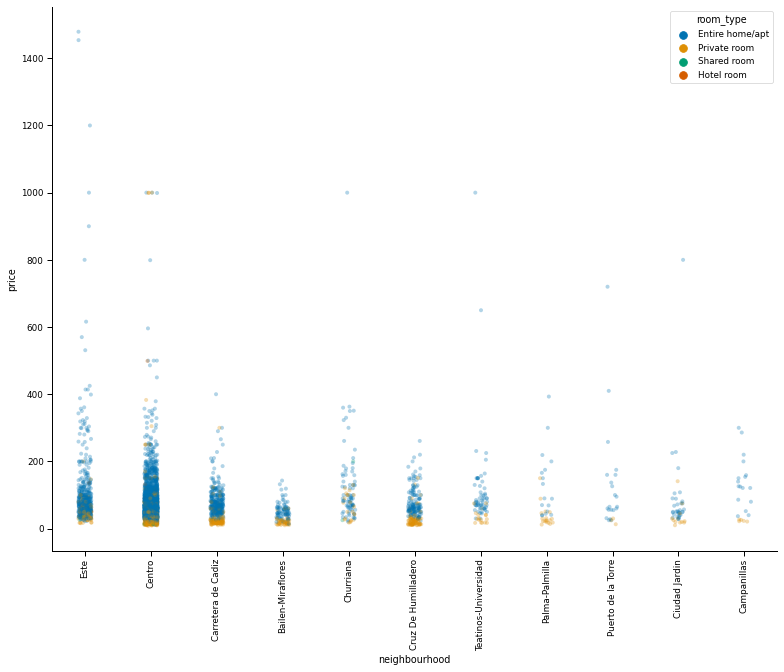

In [148]:
sns.set_context('paper')
ax, fig = plt.subplots(figsize=(13, 10))
sns.stripplot(x='neighbourhood', y='price', data=listings, hue='room_type', palette='colorblind', size=4, alpha=.3)
plt.xticks(rotation=90)
sns.despine()

* Explorar la relación entre número de noches y precio

# Results
Show graphs and stats here

# Conclusions and Next Steps
Summarize findings here